In [24]:
import pandas as pd
import numpy as np
red_wine=pd.read_csv('../../practice/winequality-red.csv', sep=';')
red_wine.columns= red_wine.columns.str.replace(' ','_')
red_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
red_wine.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [27]:
red_wine.kurt()

fixed_acidity            1.132143
volatile_acidity         1.225542
citric_acid             -0.788998
residual_sugar          28.617595
chlorides               41.715787
free_sulfur_dioxide      2.023562
total_sulfur_dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

In [28]:
#new column
red_wine['quality_label']=red_wine['quality'].apply(lambda x: 'low' if x <=5 else 'medium' if x<=7 else 'high')
red_wine['quality_label']=pd.Categorical(red_wine['quality_label'], categories=['high','medium','low'])

<AxesSubplot:>

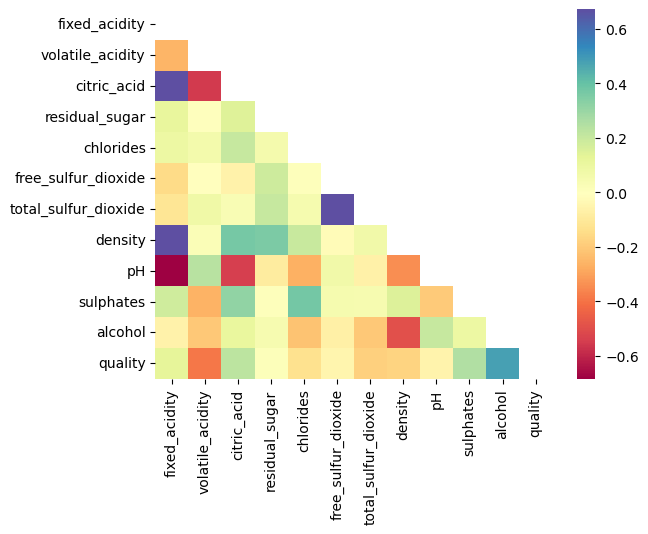

In [29]:
import seaborn as sns
sns.heatmap(red_wine.corr(), mask=np.triu(np.ones_like(red_wine.corr(),dtype=bool)), cmap='Spectral')

In [30]:
#encoding
from sklearn.preprocessing import LabelEncoder
le0=LabelEncoder()
red_wine['quality_label']=le0.fit_transform(red_wine['quality_label'])
le0.inverse_transform(red_wine['quality_label'])

array(['low', 'low', 'low', ..., 'medium', 'low', 'medium'], dtype=object)

Accuracy score :  0.5958333333333333

Cnofusion Matrix : 
 [[  0   1   4]
 [  0 141  85]
 [ 17  87 145]]

Cohen_kappa:  0.22590298848663704

 classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      0.62      0.62       226
           2       0.62      0.58      0.60       249

    accuracy                           0.60       480
   macro avg       0.41      0.40      0.41       480
weighted avg       0.61      0.60      0.60       480

Feature: 0, Score: 0.07256
Feature: 1, Score: 0.14870
Feature: 2, Score: 0.08668
Feature: 3, Score: 0.05702
Feature: 4, Score: 0.11296
Feature: 5, Score: 0.05433
Feature: 6, Score: 0.11921
Feature: 7, Score: 0.05630
Feature: 8, Score: 0.09312
Feature: 9, Score: 0.25845
Feature: 10, Score: 0.28794


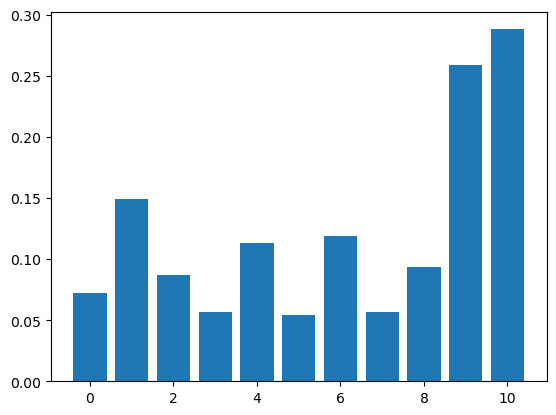

In [31]:
# ML for quality of wine Decision tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n=scale.fit_transform(x_train)
x_train_n=pd.DataFrame(x_train_n)
x_test_n=scale.fit_transform(x_test)
x_test_n=pd.DataFrame(x_test_n)
model= DecisionTreeClassifier()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
res = permutation_importance(model, x_train_n, y_train, scoring='accuracy')
importance = res.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [32]:
# ML for quality of wine RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n=scale.fit_transform(x_train)
x_train_n=pd.DataFrame(x_train_n)
x_test_n=scale.fit_transform(x_test)
x_test_n=pd.DataFrame(x_test_n)
model= RandomForestClassifier()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))

Accuracy score :  0.7104166666666667

Cnofusion Matrix : 
 [[  0   0   5]
 [  0 166  60]
 [  0  74 175]]

Cohen_kappa:  0.42680412371134024

 classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.69      0.73      0.71       226
           2       0.73      0.70      0.72       249

    accuracy                           0.71       480
   macro avg       0.47      0.48      0.48       480
weighted avg       0.70      0.71      0.71       480



/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score :  0.7083333333333334

Cnofusion Matrix : 
 [[  1   0   4]
 [  0 175  51]
 [ 15  70 164]]

Cohen_kappa:  0.4419485297170712

 classification_report: 
               precision    recall  f1-score   support

           0       0.06      0.20      0.10         5
           1       0.71      0.77      0.74       226
           2       0.75      0.66      0.70       249

    accuracy                           0.71       480
   macro avg       0.51      0.54      0.51       480
weighted avg       0.73      0.71      0.71       480

Feature :     0 , importance 0.01662
Feature :     1 , importance 0.05040
Feature :     2 , importance 0.00572
Feature :     3 , importance 0.00572
Feature :     4 , importance 0.00876
Feature :     5 , importance 0.00590
Feature :     6 , importance 0.04450
Feature :     7 , importance 0.00036
Feature :     8 , importance 0.00518
Feature :     9 , importance 0.02699
Feature :    10 , importance 0.09866


<BarContainer object of 11 artists>

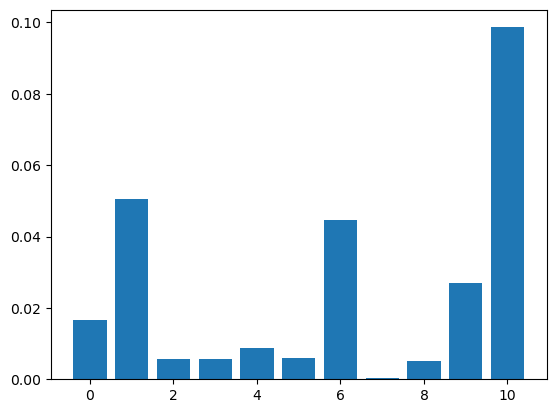

In [33]:
# ML for quality of wine LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n=scale.fit_transform(x_train)
x_train_n=pd.DataFrame(x_train_n)
x_test_n=scale.fit_transform(x_test)
x_test_n=pd.DataFrame(x_test_n)
model= LinearDiscriminantAnalysis()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance=re.importances_mean
for i,v in enumerate(importance):
    print('Feature : %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

Accuracy score :  0.6791666666666667

Cnofusion Matrix : 
 [[  0   0   5]
 [  0 181  45]
 [  7  97 145]]

Cohen_kappa:  0.378729555731119

 classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.65      0.80      0.72       226
           2       0.74      0.58      0.65       249

    accuracy                           0.68       480
   macro avg       0.46      0.46      0.46       480
weighted avg       0.69      0.68      0.68       480

Feature:     0 , importance -0.00250
Feature:     1 , importance 0.01895
Feature:     2 , importance -0.01376
Feature:     3 , importance -0.00089
Feature:     4 , importance 0.00912
Feature:     5 , importance -0.00697
Feature:     6 , importance 0.02020
Feature:     7 , importance 0.00054
Feature:     8 , importance -0.00125
Feature:     9 , importance 0.00947
Feature:    10 , importance 0.05827


<BarContainer object of 11 artists>

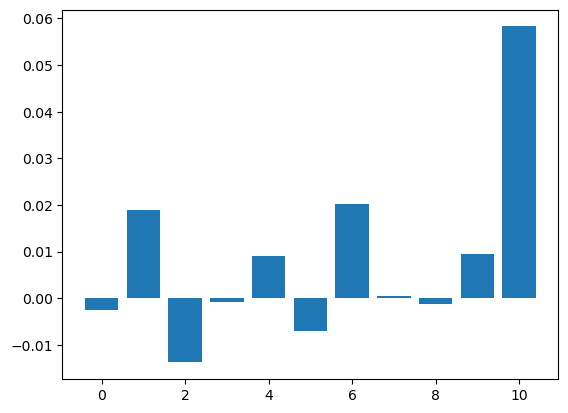

In [34]:
# ML for quality of wine GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n=scale.fit_transform(x_train)
x_train_n=pd.DataFrame(x_train_n)
x_test_n=scale.fit_transform(x_test)
x_test_n=pd.DataFrame(x_test_n)
model= GaussianNB()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance = re.importances_mean
for i, v in enumerate(importance):
    print('Feature: %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: U

Accuracy score :  0.69375

Cnofusion Matrix : 
 [[  0   0   5]
 [  0 151  75]
 [  0  67 182]]

Cohen_kappa:  0.39116779125752843

 classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.69      0.67      0.68       226
           2       0.69      0.73      0.71       249

    accuracy                           0.69       480
   macro avg       0.46      0.47      0.46       480
weighted avg       0.69      0.69      0.69       480



/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Feature:     0 , importance 0.03378
Feature:     1 , importance 0.05773
Feature:     2 , importance 0.04844
Feature:     3 , importance 0.01197
Feature:     4 , importance 0.01358
Feature:     5 , importance 0.04665
Feature:     6 , importance 0.03789
Feature:     7 , importance 0.02556
Feature:     8 , importance 0.04147
Feature:     9 , importance 0.03557
Feature:    10 , importance 0.11117


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

<BarContainer object of 11 artists>

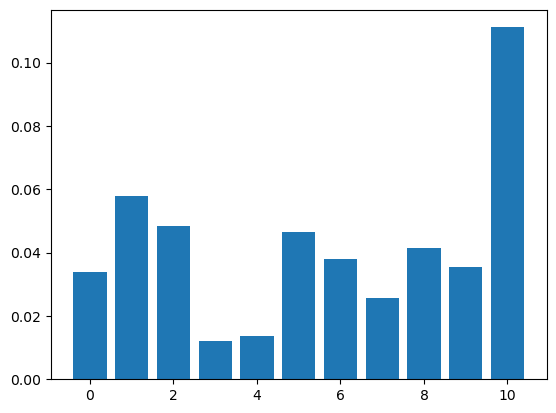

In [35]:
# ML for quality of wine KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n=scale.fit_transform(x_train)
x_train_n=pd.DataFrame(x_train_n)
x_test_n=scale.fit_transform(x_test)
x_test_n=pd.DataFrame(x_test_n)
model= KNeighborsClassifier()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance = re.importances_mean
for i, v in enumerate(importance):
    print('Feature: %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

Accuracy score :  0.7333333333333333

Cnofusion Matrix : 
 [[  0   0   5]
 [  0 172  54]
 [  0  69 180]]

Cohen_kappa:  0.47226922515310543

 classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.71      0.76      0.74       226
           2       0.75      0.72      0.74       249

    accuracy                           0.73       480
   macro avg       0.49      0.49      0.49       480
weighted avg       0.73      0.73      0.73       480



/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature:     0 , importance 0.01698
Feature:     1 , importance 0.04415
Feature:     2 , importance 0.01591
Feature:     3 , importance 0.00751
Feature:     4 , importance 0.00554
Feature:     5 , importance 0.01680
Feature:     6 , importance 0.03628
Feature:     7 , importance 0.01305
Feature:     8 , importance 0.01930
Feature:     9 , importance 0.03861
Feature:    10 , importance 0.13047


<BarContainer object of 11 artists>

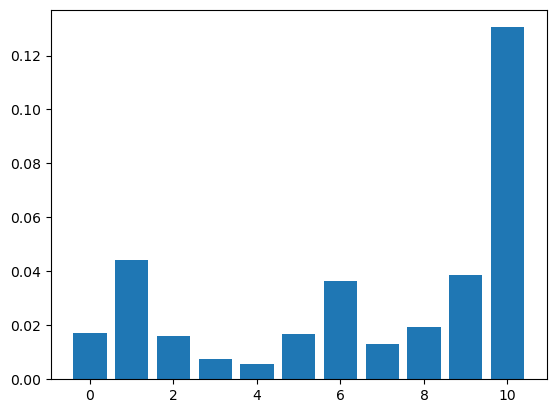

In [36]:
# ML for quality of wine SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n=scale.fit_transform(x_train)
x_train_n=pd.DataFrame(x_train_n)
x_test_n=scale.fit_transform(x_test)
x_test_n=pd.DataFrame(x_test_n)
model= SVC()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))

re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance = re.importances_mean
for i, v in enumerate(importance):
    print('Feature: %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

Accuracy score :  0.6666666666666666

Cnofusion Matrix : 
 [[  2   0   3]
 [  0 154  72]
 [ 12  73 164]]

Cohen_kappa:  0.35741358969853654

 classification_report: 
               precision    recall  f1-score   support

           0       0.14      0.40      0.21         5
           1       0.68      0.68      0.68       226
           2       0.69      0.66      0.67       249

    accuracy                           0.67       480
   macro avg       0.50      0.58      0.52       480
weighted avg       0.68      0.67      0.67       480

Feature:     0 , importance 0.00572
Feature:     1 , importance 0.01805
Feature:     2 , importance 0.01376
Feature:     3 , importance 0.00000
Feature:     4 , importance 0.01019
Feature:     5 , importance 0.00375
Feature:     6 , importance 0.03825
Feature:     7 , importance 0.01072
Feature:     8 , importance 0.01251
Feature:     9 , importance 0.09937
Feature:    10 , importance 0.08257


<BarContainer object of 11 artists>

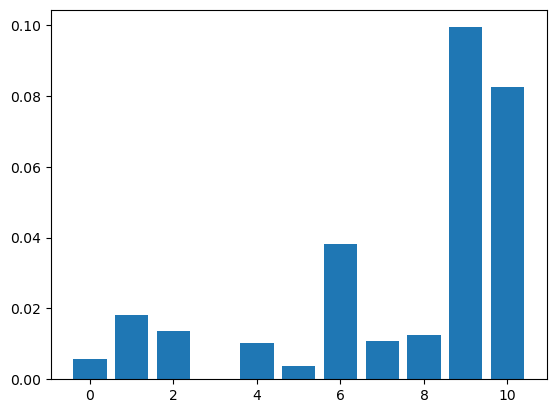

In [40]:
# ML for quality of wine AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.fit_transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
model= AdaBoostClassifier()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance = re.importances_mean
for i, v in enumerate(importance):
    print('Feature: %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)


Accuracy score :  0.6666666666666666

Cnofusion Matrix : 
 [[  2   0   3]
 [  0 154  72]
 [ 12  73 164]]

Cohen_kappa:  0.35741358969853654

 classification_report: 
               precision    recall  f1-score   support

           0       0.14      0.40      0.21         5
           1       0.68      0.68      0.68       226
           2       0.69      0.66      0.67       249

    accuracy                           0.67       480
   macro avg       0.50      0.58      0.52       480
weighted avg       0.68      0.67      0.67       480

Feature:     0 , importance 0.00375
Feature:     1 , importance 0.01269
Feature:     2 , importance 0.01412
Feature:     3 , importance 0.01215
Feature:     4 , importance 0.00322
Feature:     5 , importance 0.03896
Feature:     6 , importance 0.01358
Feature:     7 , importance 0.00769
Feature:     8 , importance 0.08651
Feature:     9 , importance 0.09348


<BarContainer object of 10 artists>

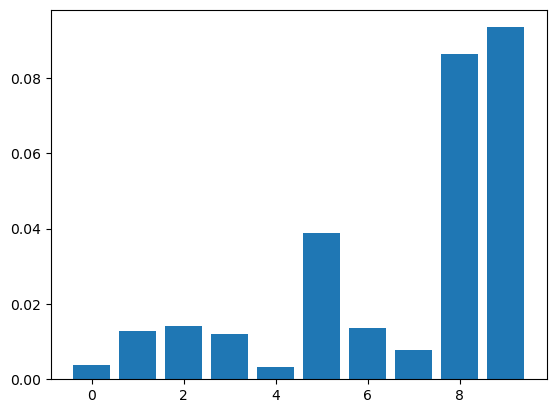

In [46]:
# ML for quality of wine AdaBoostClassifier (remove residual sugar)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label','residual_sugar'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.fit_transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
model= AdaBoostClassifier()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance = re.importances_mean
for i, v in enumerate(importance):
    print('Feature: %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

In [41]:
# this is another feature selection based on ANoVa test
from sklearn.feature_selection import f_classif
pd.DataFrame(f_classif(x_train_n, y_train), columns=x_train_n.columns, index=['f','p'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
f,8.359654,7.219896e+01,2.081849e+01,0.102900,6.318740,6.169890,3.668948e+01,1.500829e+01,0.872823,2.934489e+01,1.309919e+02
p,0.000249,3.260880e-30,1.328092e-09,0.902226,0.001867,0.002163,3.697606e-16,3.699125e-07,0.418056,3.797358e-13,7.914477e-52


Accuracy score :  0.6354166666666666

Cnofusion Matrix : 
 [[  2   0   3]
 [  0 189  37]
 [ 22 113 114]]

Cohen_kappa:  0.32083892563186245

 classification_report: 
               precision    recall  f1-score   support

           0       0.08      0.40      0.14         5
           1       0.63      0.84      0.72       226
           2       0.74      0.46      0.57       249

    accuracy                           0.64       480
   macro avg       0.48      0.56      0.47       480
weighted avg       0.68      0.64      0.63       480

Feature:     0 , importance 0.00965
Feature:     1 , importance 0.01162
Feature:     2 , importance -0.00054
Feature:     3 , importance 0.01537
Feature:     4 , importance -0.00679
Feature:     5 , importance 0.01108
Feature:     6 , importance -0.00894
Feature:     7 , importance 0.06738
Feature:     8 , importance 0.05755


<BarContainer object of 9 artists>

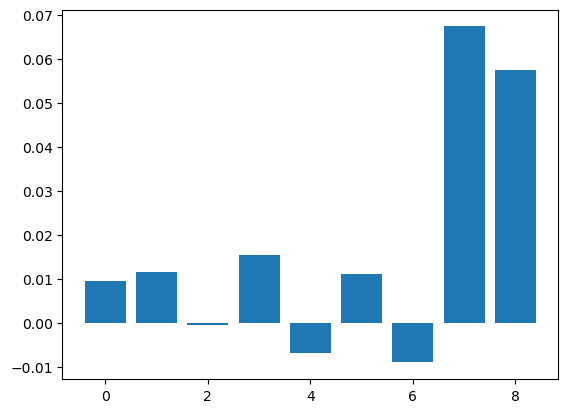

In [44]:
# ML for quality of wine AdaBoostClassifier (remove residual sugar and pH)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
x=red_wine.drop(columns=['quality', 'quality_label', 'residual_sugar','pH'])
y=red_wine['quality_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
scale=MinMaxScaler()
x_train_n= scale.fit_transform(x_train)
x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
x_test_n= scale.fit_transform(x_test)
x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
model= AdaBoostClassifier()
model.fit(x_train_n,y_train)
pred=model.predict(x_test_n)
score=accuracy_score(y_test,pred)
print('Accuracy score : ', score)
print('\nCnofusion Matrix : \n', confusion_matrix(y_test,pred))
print('\nCohen_kappa: ', cohen_kappa_score(y_test,pred))
print('\n classification_report: \n', classification_report(y_test, pred))
re=permutation_importance(model, x_train_n,y_train, scoring='accuracy')
importance = re.importances_mean
for i, v in enumerate(importance):
    print('Feature: %5d , importance %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)